<a href="https://colab.research.google.com/github/bs18b019/Data-science-work/blob/main/Acea_smart_Water_Analytic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

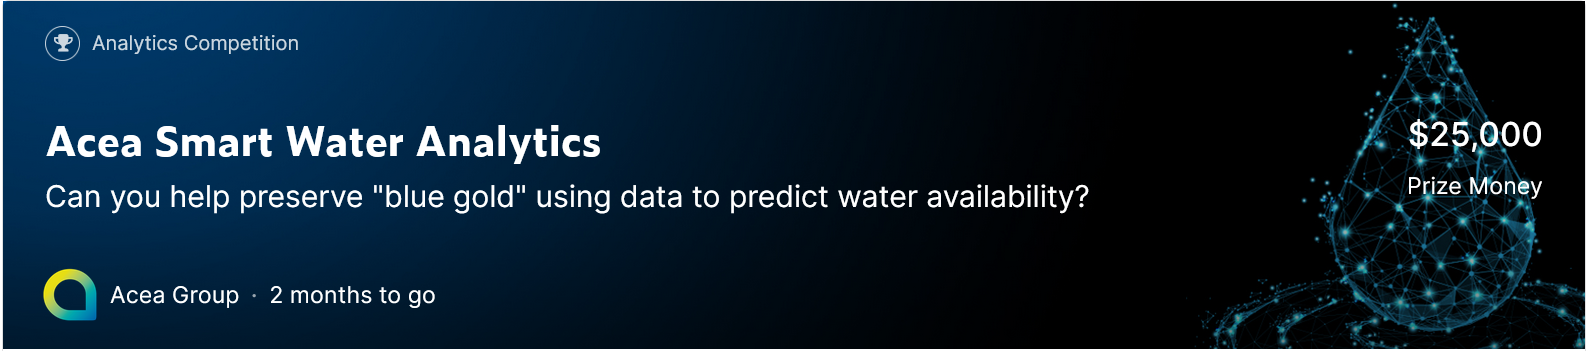This is 'Acea Smart Water Analytics ' competetion at kaggle, the detail explanation about can be found here- https://www.kaggle.com/c/acea-water-prediction/overview

This competeion has total 9 CSV file, firstly lets import all the file and necessary library.

necessery library-


Welcome

The Acea Group is one of the leading Italian multiutility operators. Listed on the Italian Stock Exchange since 1999, the company manages and develops water and electricity networks and environmental services. Acea is the foremost Italian operator in the water services sector supplying 9 million inhabitants in Lazio, Tuscany, Umbria, Molise, Campania.

In this competition we will focus only on the water sector to help Acea Group preserve precious waterbodies. As it is easy to imagine, a water supply company struggles with the need to forecast the water level in a waterbody (water spring, lake, river, or aquifer) to handle daily consumption. During fall and winter waterbodies are refilled, but during spring and summer they start to drain. To help preserve the health of these waterbodies it is important to predict the most efficient water availability, in terms of level and water flow for each day of the year.
Data

The reality is that each waterbody has such unique characteristics that their attributes are not linked to each other. This analytics competition uses datasets that are completely independent from each other. However, it is critical to understand total availability in order to preserve water across the country.

Each dataset represents a different kind of waterbody. As each waterbody is different from the other, the related features are also different. So, if for instance we consider a water spring we notice that its features are different from those of a lake. These variances are expected based upon the unique behavior and characteristics of each waterbody. The Acea Group deals with four different type of waterbodies: water springs, lakes, rivers and aquifers.
Challenge

Can you build a story to predict the amount of water in each unique waterbody? The challenge is to determine how features influence the water availability of each presented waterbody. To be more straightforward, gaining a better understanding of volumes, they will be able to ensure water availability for each time interval of the year.

The time interval is defined as day/month depending on the available measures for each waterbody. Models should capture volumes for each waterbody(for instance, for a model working on a monthly interval a forecast over the month is expected).

The desired outcome is a notebook that can generate four mathematical models, one for each category of waterbody (acquifers, water springs, river, lake) that might be applicable to each single waterbody. 
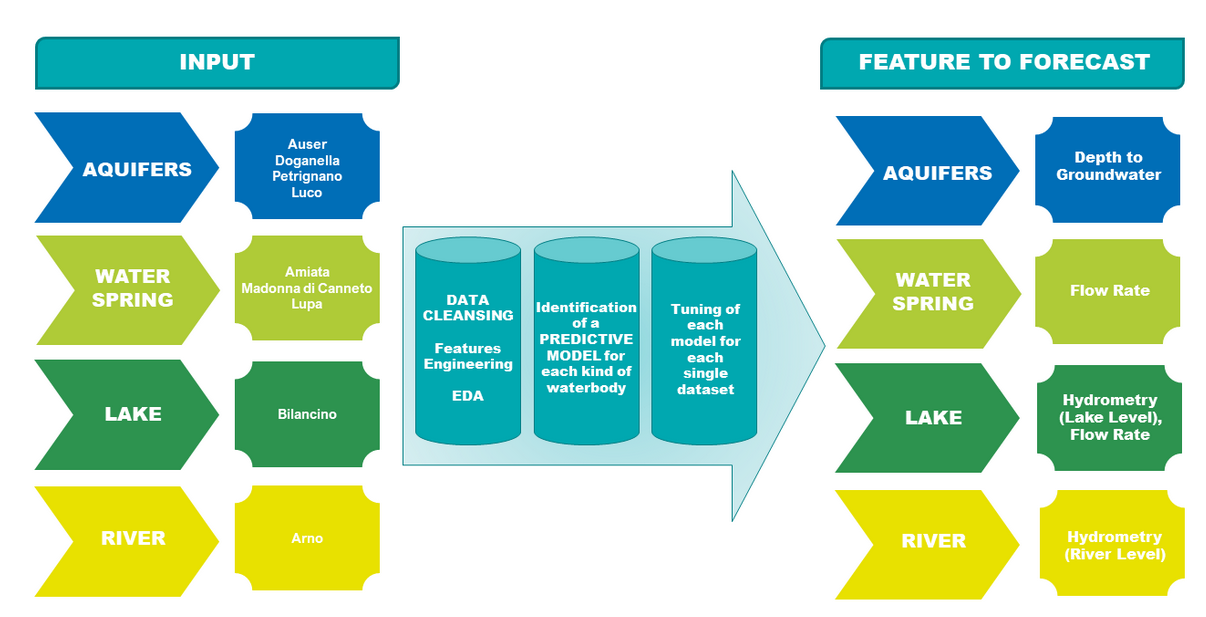

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
#from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

now lets upload all the data in this colab cloud

In [ ]:
from google.colab import files
uploaded = files.upload()

lets import "io", and Colab allows anybody to write and execute arbitrary python code through the browser, and is especially well suited to machine learning, data analysis and education.



In [ ]:
import io


Now lets import all data one by one and check the basic description about it.


In [ ]:
Aquifer_Auser = pd.read_csv(io.BytesIO(uploaded['Aquifer_Auser.csv']))
Aquifer_Doganella = pd.read_csv(io.BytesIO(uploaded['Aquifer_Doganella.csv']))
Aquifer_Luco = pd.read_csv(io.BytesIO(uploaded['Aquifer_Luco.csv']))
Aquifer_Petrignano = pd.read_csv(io.BytesIO(uploaded['Aquifer_Petrignano.csv']))
Lake_Bilancino = pd.read_csv(io.BytesIO(uploaded['Lake_Bilancino.csv']))
River_Arno = pd.read_csv(io.BytesIO(uploaded['River_Arno.csv']))
Water_Spring_Lupa = pd.read_csv(io.BytesIO(uploaded['Water_Spring_Lupa.csv']))
Water_Spring_Madonna_di_Canneto = pd.read_csv(io.BytesIO(uploaded['Water_Spring_Madonna_di_Canneto.csv']))
Water_Spring_Amiata = pd.read_csv(io.BytesIO(uploaded['Water_Spring_Amiata.csv']))

#lets create a list which conatin all data frame, so we can access data name by that list, we dont need to write data frame name all the time 
dns=['Aquifer_Auser','Aquifer_Doganella','Aquifer_Luco','Aquifer_Petrignano','Lake_Bilancino','River_Arno','Water_Spring_Lupa','Water_Spring_Amiata','Water_Spring_Madonna_di_Canneto']
dn= [Aquifer_Auser,Aquifer_Doganella,Aquifer_Luco,Aquifer_Petrignano,Lake_Bilancino,River_Arno,Water_Spring_Madonna_di_Canneto,Water_Spring_Amiata,Water_Spring_Lupa]


lets first set the display method of colab, as of now it is showing only two columns, but for better understnding of data we have to display whole column 

In [ ]:
# This will create a wider space on which the printed thing should get show
desired_width=170

pd.set_option('display.width', desired_width)

#np.set_printoption(linewidth=desired_width)
#setting the number of columns need to be show 
pd.set_option('display.max_columns',50)

now lets check how does it display


In [ ]:
print(Aquifer_Auser.head())

         Date  Rainfall_Gallicano  Rainfall_Pontetetto  Rainfall_Monte_Serra  Rainfall_Orentano  Rainfall_Borgo_a_Mozzano  Rainfall_Piaggione  Rainfall_Calavorno  \
0  05/03/1998                 NaN                  NaN                   NaN                NaN                       NaN                 NaN                 NaN   
1  06/03/1998                 NaN                  NaN                   NaN                NaN                       NaN                 NaN                 NaN   
2  07/03/1998                 NaN                  NaN                   NaN                NaN                       NaN                 NaN                 NaN   
3  08/03/1998                 NaN                  NaN                   NaN                NaN                       NaN                 NaN                 NaN   
4  09/03/1998                 NaN                  NaN                   NaN                NaN                       NaN                 NaN                 NaN   

   Rainfa

we can see here that the first column is "Date" and all the date are in serial order,  
lets see, number of missing value in each data frame and column data type of each data frame.

In [ ]:
for i in range(9):
  print('the information about data frame-',dns[i])
  print(dn[i].info())
  print(dn[i].describe())
  print('')
  print('')
  print('')

the information about data frame- Aquifer_Auser
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     8154 non-null   object 
 1   Rainfall_Gallicano                       5295 non-null   float64
 2   Rainfall_Pontetetto                      5295 non-null   float64
 3   Rainfall_Monte_Serra                     5289 non-null   float64
 4   Rainfall_Orentano                        5295 non-null   float64
 5   Rainfall_Borgo_a_Mozzano                 5295 non-null   float64
 6   Rainfall_Piaggione                       4930 non-null   float64
 7   Rainfall_Calavorno                       5295 non-null   float64
 8   Rainfall_Croce_Arcana                    5295 non-null   float64
 9   Rainfall_Tereglio_Coreglia_Antelminelli  5295 non-null   float64
 10  

As we can see here that all the data frame contain 'Date' column, and their data type is "object', so that means they are in string format not in dateTime format, and let's first column in date-time format.
Lets first convert it into data time format.

In [ ]:
for i in range(9):
  dn[i]['Date'] = dn[i]['Date'].apply(pd.to_datetime)
  #dn[i].set_index('Date',inplace=True)
  dn[i].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Date                                     8154 non-null   datetime64[ns]
 1   Rainfall_Gallicano                       5295 non-null   float64       
 2   Rainfall_Pontetetto                      5295 non-null   float64       
 3   Rainfall_Monte_Serra                     5289 non-null   float64       
 4   Rainfall_Orentano                        5295 non-null   float64       
 5   Rainfall_Borgo_a_Mozzano                 5295 non-null   float64       
 6   Rainfall_Piaggione                       4930 non-null   float64       
 7   Rainfall_Calavorno                       5295 non-null   float64       
 8   Rainfall_Croce_Arcana                    5295 non-null   float64       
 9   Rainfall_Tereglio_Coreglia_Antelminelli  

Now we can also see that all column are in float type, now lets check the shape of each data.
 

In [ ]:
for i in range(9):
  print(dns[i])
  print(dn[i].shape)

Aquifer_Auser
(8154, 27)
Aquifer_Doganella
(6026, 22)
Aquifer_Luco
(7487, 22)
Aquifer_Petrignano
(5223, 8)
Lake_Bilancino
(6603, 9)
River_Arno
(8217, 17)
Water_Spring_Lupa
(3113, 4)
Water_Spring_Amiata
(7487, 16)
Water_Spring_Madonna_di_Canneto
(4199, 3)


let's attache a detail description of data- 
This competition uses nine different datasets, completely independent and not linked to each other. Each dataset can represent a different kind of waterbody. As each waterbody is different from the other, the related features as well are different from each other. So, if for instance we consider a water spring we notice that its features are different from the lake’s one. This is correct and reflects the behavior and characteristics of each waterbody. The Acea Group deals with four different type of waterbodies: water spring (for which three datasets are provided), lake (for which a dataset is provided), river (for which a dataset is provided) and aquifers (for which four datasets are provided).

Let’s see how these nine waterbodies differ from each other.

    Waterbody: Auser

Type: Aquifer

Description: This waterbody consists of two subsystems, called NORTH and SOUTH, where the former partly influences the behavior of the latter. Indeed, the north subsystem is a water table (or unconfined) aquifer while the south subsystem is an artesian (or confined) groundwater.

The levels of the NORTH sector are represented by the values of the SAL, PAG, CoS and DIEC wells, while the levels of the SOUTH sector by the LT2 well.

    Waterbody: Petrignano

Type: Aquifer

Description: The wells field of the alluvial plain between Ospedalicchio di Bastia Umbra and Petrignano is fed by three underground aquifers separated by low permeability septa. The aquifer can be considered a water table groundwater and is also fed by the Chiascio river. The groundwater levels are influenced by the following parameters: rainfall, depth to groundwater, temperatures and drainage volumes, level of the Chiascio river.

    Waterbody: Doganella

Type: Aquifer

Description: The wells field Doganella is fed by two underground aquifers not fed by rivers or lakes but fed by meteoric infiltration. The upper aquifer is a water table with a thickness of about 30m. The lower aquifer is a semi-confined artesian aquifer with a thickness of 50m and is located inside lavas and tufa products. These aquifers are accessed through wells called Well 1, ..., Well 9. Approximately 80% of the drainage volumes come from the artesian aquifer. The aquifer levels are influenced by the following parameters: rainfall, humidity, subsoil, temperatures and drainage volumes.

    Waterbody: Luco

Type: Aquifer

Description: The Luco wells field is fed by an underground aquifer. This aquifer not fed by rivers or lakes but by meteoric infiltration at the extremes of the impermeable sedimentary layers. Such aquifer is accessed through wells called Well 1, Well 3 and Well 4 and is influenced by the following parameters: rainfall, depth to groundwater, temperature and drainage volumes.

    Waterbody: Amiata

Type: Water spring

Description: The Amiata waterbody is composed of a volcanic aquifer not fed by rivers or lakes but fed by meteoric infiltration. This aquifer is accessed through Ermicciolo, Arbure, Bugnano and Galleria Alta water springs. The levels and volumes of the four sources are influenced by the parameters: rainfall, depth to groundwater, hydrometry, temperatures and drainage volumes.

    Waterbody: Madonna di Canneto

Type: Water spring

Description: The Madonna di Canneto spring is situated at an altitude of 1010m above sea level in the Canneto valley. It does not consist of an aquifer and its source is supplied by the water catchment area of the river Melfa.

    Waterbody: Lupa

Type: Water spring

Description: this water spring is located in the Rosciano Valley, on the left side of the Nera river. The waters emerge at an altitude of about 375 meters above sea level through a long draining tunnel that crosses, in its final section, lithotypes and essentially calcareous rocks. It provides drinking water to the city of Terni and the towns around it.

    Waterbody: Arno

Type: River

Description: Arno is the second largest river in peninsular Italy and the main waterway in Tuscany and it has a relatively torrential regime, due to the nature of the surrounding soils (marl and impermeable clays). Arno results to be the main source of water supply of the metropolitan area of Florence-Prato-Pistoia. The availability of water for this waterbody is evaluated by checking the hydrometric level of the river at the section of Nave di Rosano.

    Waterbody: Bilancino

Type: Lake

Description: Bilancino lake is an artificial lake located in the municipality of Barberino di Mugello (about 50 km from Florence). It is used to refill the Arno river during the summer months. Indeed, during the winter months, the lake is filled up and then, during the summer months, the water of the lake is poured into the Arno river.

Each waterbody has its own different features to be predicted. The table below shows the expected feature to forecast for each waterbody. 
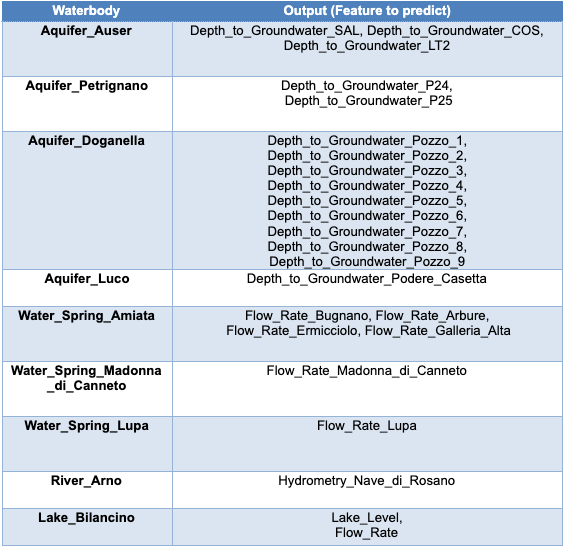

Now lets worry about the first data set

In [ ]:
print(Aquifer_Auser.head())

        Date  Rainfall_Gallicano  Rainfall_Pontetetto  Rainfall_Monte_Serra  Rainfall_Orentano  Rainfall_Borgo_a_Mozzano  Rainfall_Piaggione  Rainfall_Calavorno  \
0 1998-05-03                 NaN                  NaN                   NaN                NaN                       NaN                 NaN                 NaN   
1 1998-06-03                 NaN                  NaN                   NaN                NaN                       NaN                 NaN                 NaN   
2 1998-07-03                 NaN                  NaN                   NaN                NaN                       NaN                 NaN                 NaN   
3 1998-08-03                 NaN                  NaN                   NaN                NaN                       NaN                 NaN                 NaN   
4 1998-09-03                 NaN                  NaN                   NaN                NaN                       NaN                 NaN                 NaN   

   Rainfall_Cro

lets plot the Depth_to_Groundwater_LT2 over a whole period of time from( 1998 to 2020)

"\nfor ax in axs.flat:\n    ax.set(xlabel='Date', ylabel=y)\n\n# Hide x labels and tick labels for top plots and y ticks for right plots.\nfor ax in axs.flat:\n    ax.label_outer()\n"

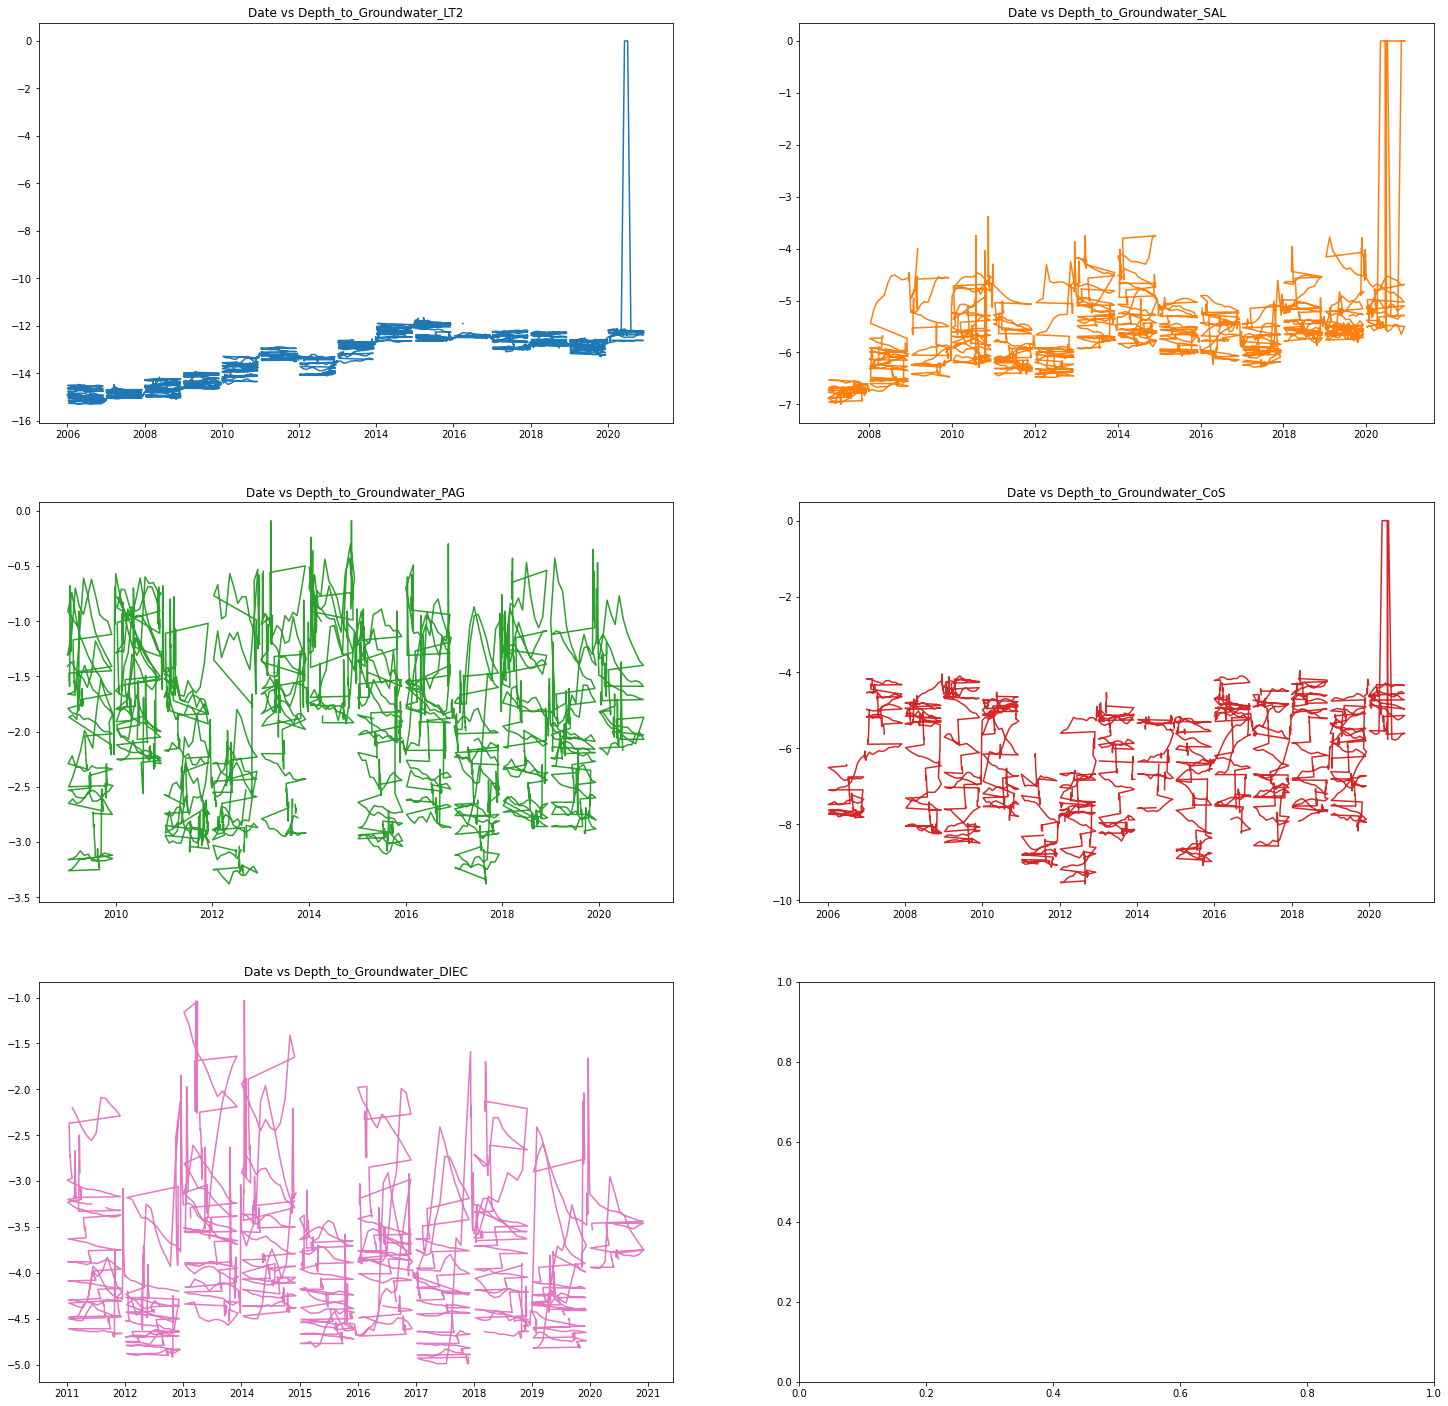

In [ ]:
x='Date'
y=['Depth_to_Groundwater_LT2',  'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',  'Depth_to_Groundwater_CoS',  'Depth_to_Groundwater_DIEC']
#plt.figure(figsize=(20,20))
fig, axs = plt.subplots(3, 2, figsize=(25,25))
axs[0, 0].plot(dn[0][x], dn[0][y[0]])
axs[0, 0].set_title(x+" vs "+y[0])
axs[0, 1].plot(dn[0][x], dn[0][y[1]], 'tab:orange')
axs[0, 1].set_title(x+" vs "+y[1])
axs[1, 0].plot(dn[0][x], dn[0][y[2]], 'tab:green')
axs[1, 0].set_title(x+" vs "+y[2])
axs[1, 1].plot(dn[0][x], dn[0][y[3]], 'tab:red')
axs[1, 1].set_title(x+" vs "+y[3])
axs[2, 0].plot(dn[0][x], dn[0][y[4]], 'tab:pink')
axs[2, 0].set_title(x+" vs "+y[4])

'''
for ax in axs.flat:
    ax.set(xlabel='Date', ylabel=y)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
'''

They said us that we need to predict only 'Depth_to_Groundwater_LT2',  'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_CoS', so we will worry only about this.
If we look all the three column so only  Depth_to_Groundwater_LT2 is has some constatnt growth and others are randomally distributed, and one more intresting thing is here that after 2020 all the three tending to "0" ground depth, this is sudden change and possible only due to natural desister. 

lets closesly visualise the data after 2020-03

Text(0.5, 1.0, 'Date vs Depth_to_Groundwater_DIEC')

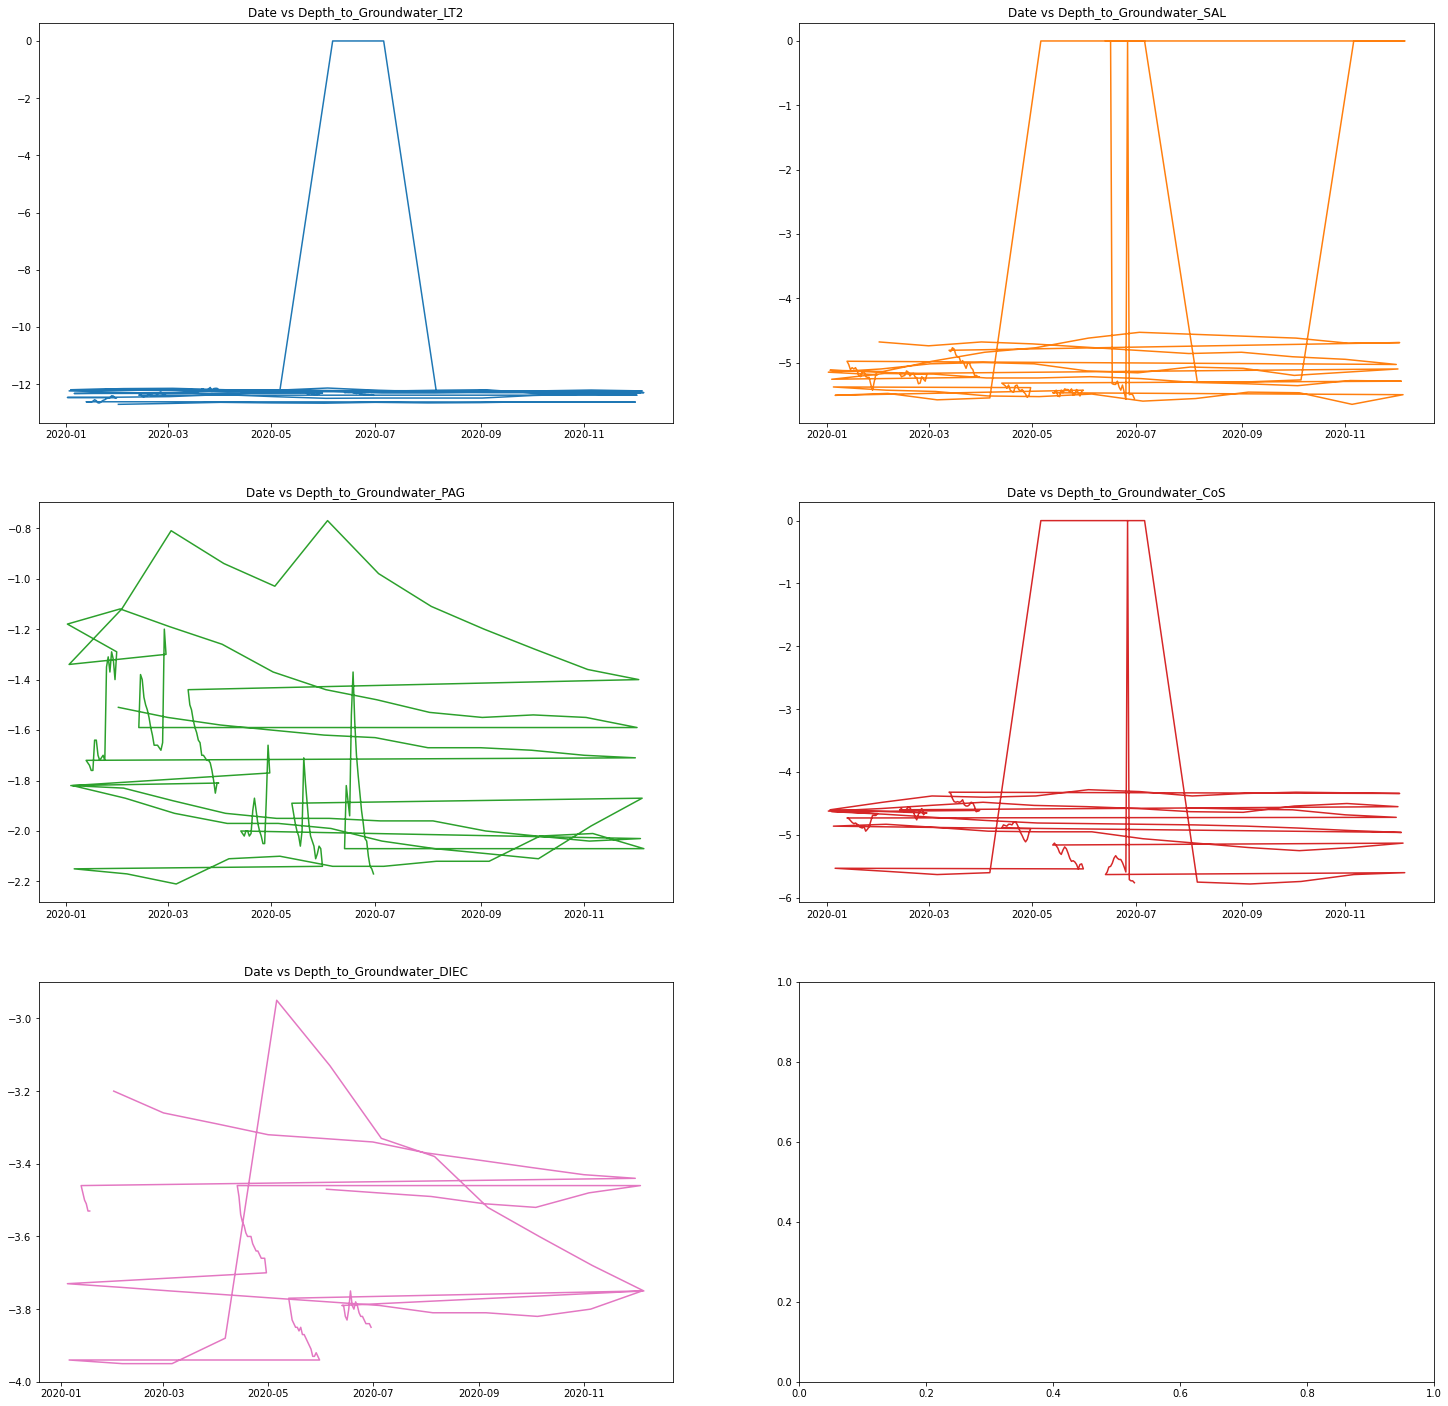

In [ ]:
af19=Aquifer_Auser[Aquifer_Auser['Date']>'2020']
dn.append(af19)
x='Date'
y=['Depth_to_Groundwater_LT2',  'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',  'Depth_to_Groundwater_CoS',  'Depth_to_Groundwater_DIEC']
#plt.figure(figsize=(20,20))
fig, axs = plt.subplots(3, 2, figsize=(25,25))
axs[0, 0].plot(dn[-1][x], dn[-1][y[0]])
axs[0, 0].set_title(x+" vs "+y[0])
axs[0, 1].plot(dn[-1][x], dn[-1][y[1]], 'tab:orange')
axs[0, 1].set_title(x+" vs "+y[1])
axs[1, 0].plot(dn[-1][x], dn[-1][y[2]], 'tab:green')
axs[1, 0].set_title(x+" vs "+y[2])
axs[1, 1].plot(dn[-1][x], dn[-1][y[3]], 'tab:red')
axs[1, 1].set_title(x+" vs "+y[3])
axs[2, 0].plot(dn[-1][x], dn[-1][y[4]], 'tab:pink')
axs[2, 0].set_title(x+" vs "+y[4])

Our first task is why we are getting this kind of sudden change, to visualise it lets plot other feature together during this period, feature like( how tampreture varies at this period and what is condition of rainfall, 

In [ ]:
print(Aquifer_Auser.columns)

Index(['Date', 'Rainfall_Gallicano', 'Rainfall_Pontetetto', 'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano', 'Rainfall_Piaggione',
       'Rainfall_Calavorno', 'Rainfall_Croce_Arcana', 'Rainfall_Tereglio_Coreglia_Antelminelli', 'Rainfall_Fabbriche_di_Vallico', 'Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG', 'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC', 'Temperature_Orentano',
       'Temperature_Monte_Serra', 'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico', 'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA',
       'Volume_CSAL', 'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione'],
      dtype='object')


lets visualise the rainfall condition while we get sudden change

'\naxs[0, 1].plot(dn[-1][x], dn[-1][y[1]], \'tab:orange\')\naxs[0, 1].set_title(x+" vs "+y[1])\naxs[1, 0].plot(dn[-1][x], dn[-1][y[2]], \'tab:green\')\naxs[1, 0].set_title(x+" vs "+y[2])\naxs[1, 1].plot(dn[-1][x], dn[-1][y[3]], \'tab:red\')\naxs[1, 1].set_title(x+" vs "+y[3])\naxs[2, 0].plot(dn[-1][x], dn[-1][y[4]], \'tab:pink\')\naxs[2, 0].set_title(x+" vs "+y[4])\n'

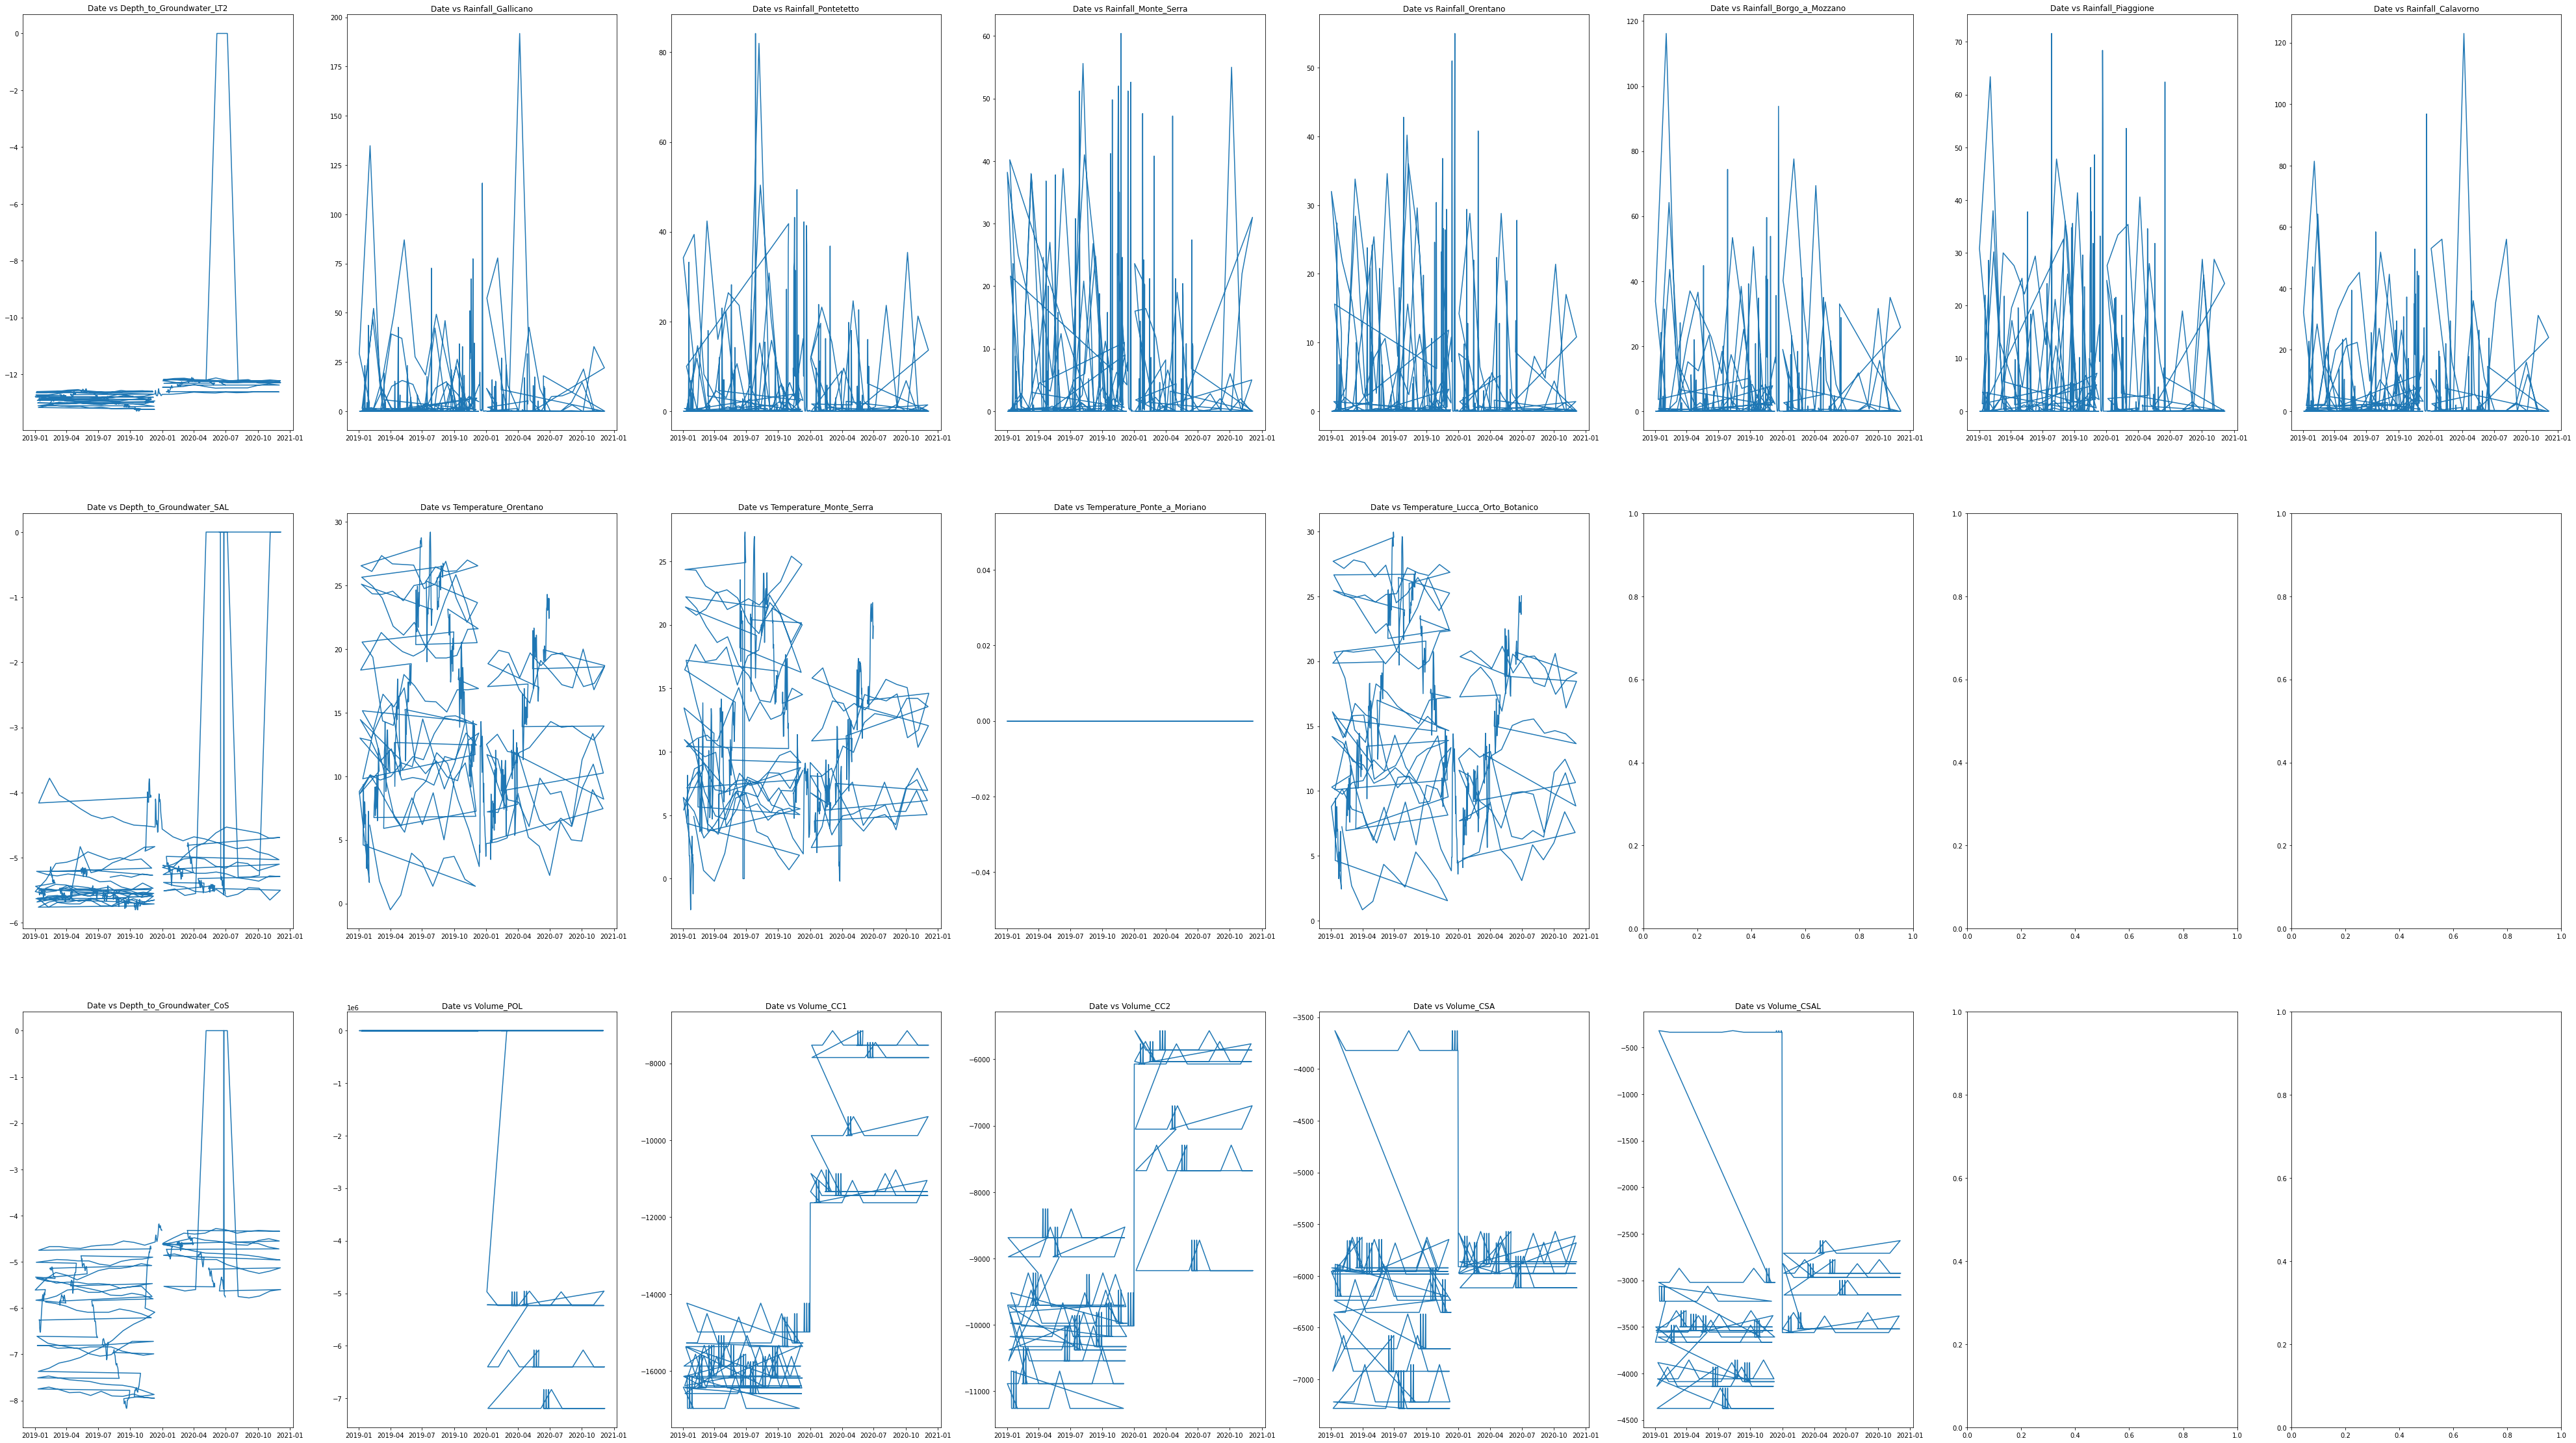

In [ ]:
rainfall=['Rainfall_Gallicano', 'Rainfall_Pontetetto', 'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano', 'Rainfall_Piaggione','Rainfall_Calavorno', 'Rainfall_Croce_Arcana', 'Rainfall_Tereglio_Coreglia_Antelminelli']
v=['Depth_to_Groundwater_LT2','Depth_to_Groundwater_SAL','Depth_to_Groundwater_CoS']
tampre=['Temperature_Orentano','Temperature_Monte_Serra', 'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico']
vol=['Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA','Volume_CSAL']
hy= ['Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione']

af19=Aquifer_Auser[Aquifer_Auser['Date']>'2019']
dn.append(af19)
x='Date'
y=v
#plt.figure(figsize=(20,20))
fig, axs = plt.subplots(3, 8, figsize=(70,40))
axs[0, 0].plot(dn[-1][x], dn[-1][y[0]])
axs[0, 0].set_title(x+" vs "+y[0])
for i in range(7):
  axs[0, i+1].plot(dn[-1][x], dn[-1][rainfall[i]])
  axs[0, i+1].set_title(x+" vs "+rainfall[i])

axs[1, 0].plot(dn[-1][x], dn[-1][y[1]])
axs[1, 0].set_title(x+" vs "+y[1])
for i in range(4):
  axs[1, i+1].plot(dn[-1][x], dn[-1][tampre[i]])
  axs[1, i+1].set_title(x+" vs "+tampre[i])

axs[2, 0].plot(dn[-1][x], dn[-1][y[2]])
axs[2, 0].set_title(x+" vs "+y[2])
for i in range(5):
  axs[2, i+1].plot(dn[-1][x], dn[-1][vol[i]])
  axs[2, i+1].set_title(x+" vs "+vol[i])

'''
axs[0, 1].plot(dn[-1][x], dn[-1][y[1]], 'tab:orange')
axs[0, 1].set_title(x+" vs "+y[1])
axs[1, 0].plot(dn[-1][x], dn[-1][y[2]], 'tab:green')
axs[1, 0].set_title(x+" vs "+y[2])
axs[1, 1].plot(dn[-1][x], dn[-1][y[3]], 'tab:red')
axs[1, 1].set_title(x+" vs "+y[3])
axs[2, 0].plot(dn[-1][x], dn[-1][y[4]], 'tab:pink')
axs[2, 0].set_title(x+" vs "+y[4])
'''

As we can in figure that the sudden change in water depth might be bacsue heavily raining, but tampreture and other feature approximately being normal as they ware before. 


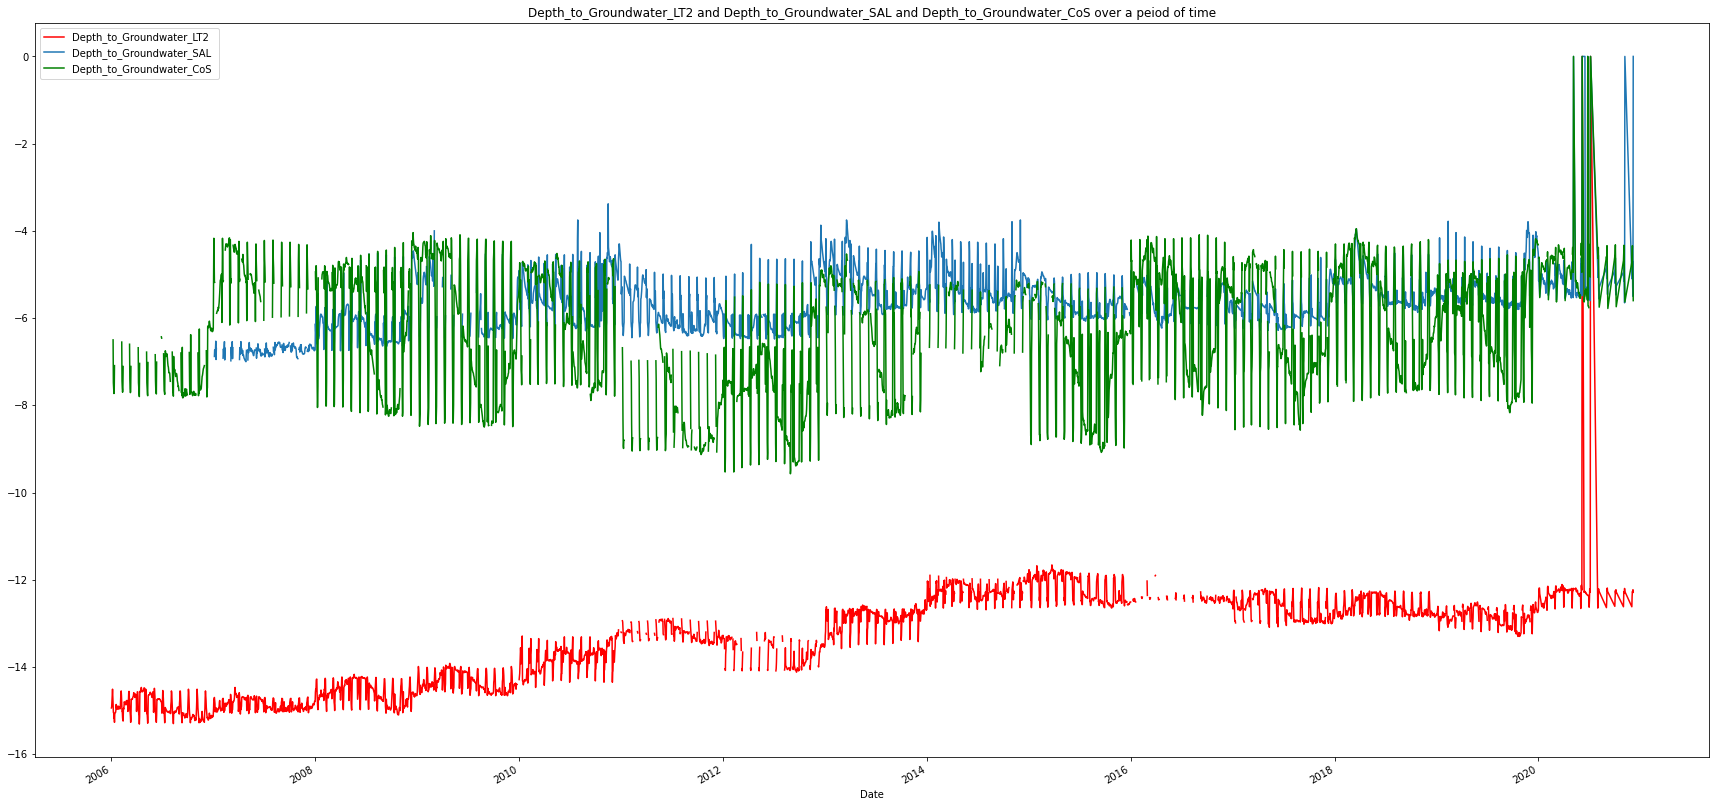

In [ ]:
Aquifer_Auser['Depth_to_Groundwater_LT2'].plot(figsize=(30,15),title='Depth_to_Groundwater_LT2 and Depth_to_Groundwater_SAL and Depth_to_Groundwater_CoS over a peiod of time', color='red',label='Depth_to_Groundwater_LT2')
Aquifer_Auser['Depth_to_Groundwater_SAL'].plot(figsize=(30,15),label='Depth_to_Groundwater_SAL')
Aquifer_Auser['Depth_to_Groundwater_CoS'].plot(figsize=(30,15), color='green',label='Depth_to_Groundwater_CoS ')

plt.legend()
plt.show()

We plotted three line plot over time but they are overlapping to each other, so but still we can do some quick analysis that-

Depth to ground water_lt2[link text](https://) slightly decreasing as time increasing and depth to ground water SAL and Pos are almost being constant over period of time



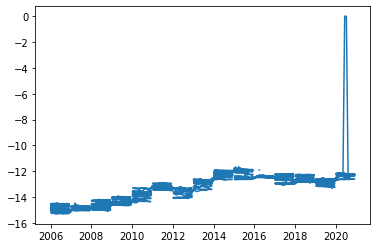

In [ ]:
plt.plot(Aquifer_Auser['Depth_to_Groundwater_LT2'])
plt.show()

In [ ]:
print(dn[0].index.max())
print(dn[0].index.min())

2020-12-06 00:00:00
1998-01-04 00:00:00


In [ ]:
print(dn[0]['2006':'2015'].shape)
print(dn[0]['2006':'2015'].head())
print(dn[0]['2006-02':'2015-01'].shape)

(3652, 26)
            Rainfall_Gallicano  Rainfall_Pontetetto  Rainfall_Monte_Serra  Rainfall_Orentano  Rainfall_Borgo_a_Mozzano  Rainfall_Piaggione  Rainfall_Calavorno  \
Date                                                                                                                                                             
2006-01-01                37.2                 26.0                  21.4               43.2                      29.4                35.2                31.2   
2006-02-01                 3.2                  8.4                   0.2                8.0                       6.0                 7.4                 3.6   
2006-03-01                 0.2                  0.0                   0.0                0.2                       0.0                 0.2                 0.0   
2006-04-01                 0.0                  0.2                   0.0                0.0                       0.0                 0.0                 0.2   
2006-05-01       

AssertionError: ignored

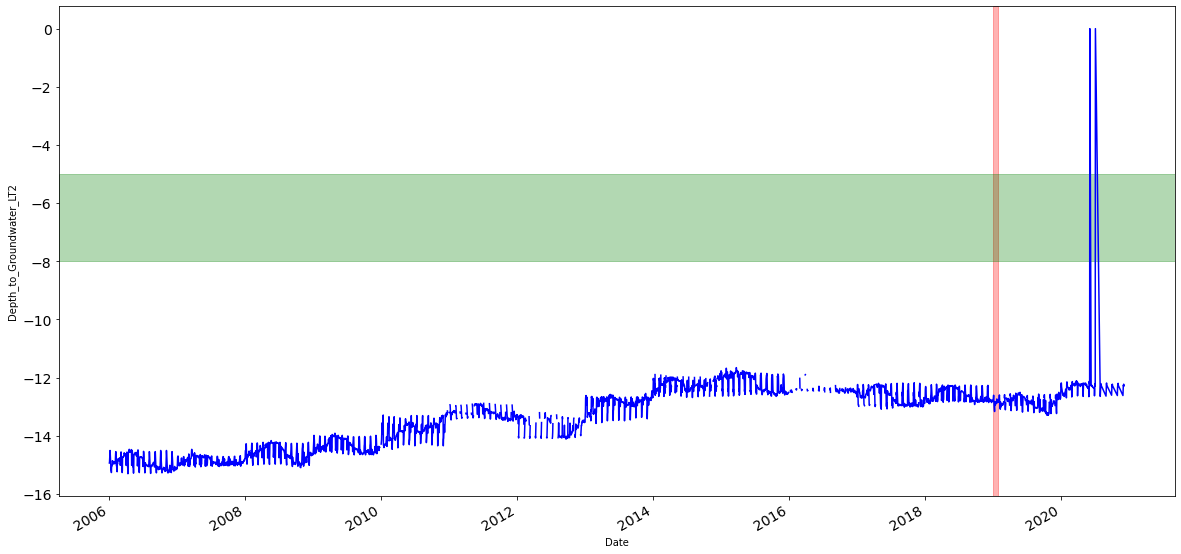

In [ ]:
ax = Aquifer_Auser['Depth_to_Groundwater_LT2'].plot(figsize=(20,10),color='blue',fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Depth_to_Groundwater_LT2')

ax.axvspan('2019-01-01','2019-01-31', color='red', alpha=0.3)
ax.axhspan(-5,-8, color='green',alpha=0.3)

plt.show()

lets see how the Depth_to_Groundwater_LT2 value is distributed.

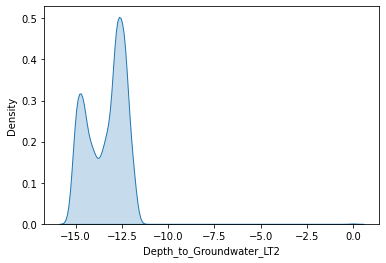

In [ ]:


sns.kdeplot(Aquifer_Auser['Depth_to_Groundwater_LT2'],shade=True)

